In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Dataset District\\NASA\\NASA NIZAMABAD.csv") # Laoding data

In [11]:
df

,Date,temp_max,rainfall,pressure,Humidity
0,1/1/1991,29.48,0.00,96.24,6.16
1,1/2/1991,29.50,0.01,96.20,3.78
2,1/3/1991,26.30,0.00,96.38,3.48
3,1/4/1991,28.37,0.00,96.51,3.78
4,1/5/1991,29.22,0.00,96.48,6.59
...,...,...,...,...,...
11683,12/27/2022,29.30,2.63,96.61,15.44
11684,12/28/2022,29.71,1.74,96.69,14.40
11685,12/29/2022,29.05,0.00,96.82,11.60
11686,12/30/2022,29.69,0.00,96.86,11.17


In [12]:
df.describe()

,temp_max,rainfall,pressure,Humidity
count,11688.000000,11688.000000,11688.000000,11688.000000
mean,33.223156,2.512736,96.012414,12.022953
std,4.941911,7.038509,0.433878,4.876900
min,20.790000,0.000000,94.460000,0.730000
25%,29.380000,0.000000,95.650000,7.690000
50%,31.790000,0.010000,96.000000,11.840000
75%,36.942500,1.580000,96.380000,16.970000
max,46.010000,253.490000,97.090000,20.570000


In [14]:
df['Date']= pd.to_datetime(df.Date, format="%m/%d/%Y") # Converting column 'date' to pandas datetime object
df= df.set_index('Date') # Setting the above column as the index of the dataframe

In [15]:
print(pd.infer_freq(df.index))

D


In [16]:
df['rainfall']=df['rainfall']/(df['rainfall'].max())
df['temp_max']=df['temp_max']/(df['temp_max'].max())
df['pressure']=df['pressure']/(df['pressure'].max())
df['Humidity']=df['Humidity']/(df['Humidity'].max())

In [22]:
df.describe()

,temp_max,rainfall,pressure,Humidity
count,11688.000000,11688.000000,11688.000000,11688.000000
mean,0.722086,0.009913,0.988901,0.584490
std,0.107410,0.027766,0.004469,0.237088
min,0.451858,0.000000,0.972912,0.035489
25%,0.638557,0.000000,0.985168,0.373845
50%,0.690937,0.000039,0.988773,0.575596
75%,0.802923,0.006233,0.992687,0.824988
max,1.000000,1.000000,1.000000,1.000000


In [20]:
df1=df[:10958]

In [23]:
df1=df1.drop(['pressure'], axis=1) 

In [24]:
def create_data(df, lookback=365):
    df_np= df.to_numpy()
    X=[]
    y=[]
    
    for i in range(len(df_np)-2*lookback):
        row = [x for x in df_np[i:i+lookback]]
        X.append(row)
        label = [z[0] for z in df_np[i+lookback:i+(2*lookback)]]
        y.append(label)
    return np.array(X), np.array(y)

In [25]:
X,y = create_data(df1)

In [26]:
X.shape, y.shape

((10228, 365, 3), (10228, 365))

In [27]:
X_train, y_train, X_test, y_test = X[:9863], y[:9863], X[9863:], y[9863:]
X_train, y_train, X_val, y_val= X_train[:9133], y_train[:9133], X_train[9133:9863], y_train[9133:9863]

In [28]:
len(X_train), len(X_val), len(X_test)

(9133, 730, 365)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam

In [32]:
# Creating an LSTM layer
nizama_temp= Sequential([
    InputLayer((365,3)),
    LSTM(units=128),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(365, activation='relu'),  
])

nizama_temp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               67584     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dense_3 (Dense)             (None, 365)               187245    
                                                                 
Total params: 320,877
Trainable params: 320,877
Non-trainable params: 0
_________________________________________________________________


In [33]:
nizama_cp= ModelCheckpoint('nizama_temp/', save_best_only=True)
nizama_temp.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(),
    metrics=[MeanAbsolutePercentageError()]
)
epochs=200
history=nizama_temp.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=epochs, callbacks=[nizama_cp])

Epoch 1/200
286/286 [==============================] - ETA: 0s - loss: 0.0627 - mean_absolute_percentage_error: 21.0476

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 30s 78ms/step - loss: 0.0627 - mean_absolute_percentage_error: 21.0476 - val_loss: 0.0474 - val_mean_absolute_percentage_error: 15.7595
Epoch 2/200
285/286 [============================>.] - ETA: 0s - loss: 0.0359 - mean_absolute_percentage_error: 13.1751

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 75ms/step - loss: 0.0359 - mean_absolute_percentage_error: 13.1730 - val_loss: 0.0355 - val_mean_absolute_percentage_error: 13.6770
Epoch 3/200
285/286 [============================>.] - ETA: 0s - loss: 0.0258 - mean_absolute_percentage_error: 10.4553

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 23s 80ms/step - loss: 0.0258 - mean_absolute_percentage_error: 10.4541 - val_loss: 0.0277 - val_mean_absolute_percentage_error: 12.3711
Epoch 4/200
285/286 [============================>.] - ETA: 0s - loss: 0.0214 - mean_absolute_percentage_error: 9.2901

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 23s 78ms/step - loss: 0.0214 - mean_absolute_percentage_error: 9.2883 - val_loss: 0.0198 - val_mean_absolute_percentage_error: 9.9902
Epoch 5/200
285/286 [============================>.] - ETA: 0s - loss: 0.0165 - mean_absolute_percentage_error: 8.2925

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 73ms/step - loss: 0.0165 - mean_absolute_percentage_error: 8.2924 - val_loss: 0.0180 - val_mean_absolute_percentage_error: 9.5610
Epoch 6/200
285/286 [============================>.] - ETA: 0s - loss: 0.0159 - mean_absolute_percentage_error: 8.1218

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 78ms/step - loss: 0.0159 - mean_absolute_percentage_error: 8.1215 - val_loss: 0.0180 - val_mean_absolute_percentage_error: 9.3762
Epoch 7/200
285/286 [============================>.] - ETA: 0s - loss: 0.0159 - mean_absolute_percentage_error: 8.0548

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 23s 79ms/step - loss: 0.0159 - mean_absolute_percentage_error: 8.0545 - val_loss: 0.0172 - val_mean_absolute_percentage_error: 8.6033
Epoch 8/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0158 - mean_absolute_percentage_error: 7.9813 - val_loss: 0.0172 - val_mean_absolute_percentage_error: 8.5207
Epoch 9/200
285/286 [============================>.] - ETA: 0s - loss: 0.0158 - mean_absolute_percentage_error: 7.9507

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 75ms/step - loss: 0.0158 - mean_absolute_percentage_error: 7.9505 - val_loss: 0.0171 - val_mean_absolute_percentage_error: 8.4819
Epoch 10/200
286/286 [==============================] - 16s 57ms/step - loss: 0.0158 - mean_absolute_percentage_error: 7.9377 - val_loss: 0.0174 - val_mean_absolute_percentage_error: 8.7212
Epoch 11/200
285/286 [============================>.] - ETA: 0s - loss: 0.0157 - mean_absolute_percentage_error: 7.8898

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0157 - mean_absolute_percentage_error: 7.8891 - val_loss: 0.0170 - val_mean_absolute_percentage_error: 8.4365
Epoch 12/200
285/286 [============================>.] - ETA: 0s - loss: 0.0157 - mean_absolute_percentage_error: 7.8439

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0157 - mean_absolute_percentage_error: 7.8436 - val_loss: 0.0168 - val_mean_absolute_percentage_error: 8.0486
Epoch 13/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0157 - mean_absolute_percentage_error: 7.8483 - val_loss: 0.0170 - val_mean_absolute_percentage_error: 8.4110
Epoch 14/200
285/286 [============================>.] - ETA: 0s - loss: 0.0147 - mean_absolute_percentage_error: 7.6852

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0147 - mean_absolute_percentage_error: 7.6853 - val_loss: 0.0152 - val_mean_absolute_percentage_error: 7.7132
Epoch 15/200
285/286 [============================>.] - ETA: 0s - loss: 0.0142 - mean_absolute_percentage_error: 7.5187

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0142 - mean_absolute_percentage_error: 7.5186 - val_loss: 0.0151 - val_mean_absolute_percentage_error: 7.6231
Epoch 16/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0142 - mean_absolute_percentage_error: 7.5407 - val_loss: 0.0152 - val_mean_absolute_percentage_error: 7.7816
Epoch 17/200
285/286 [============================>.] - ETA: 0s - loss: 0.0141 - mean_absolute_percentage_error: 7.4928

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 79ms/step - loss: 0.0141 - mean_absolute_percentage_error: 7.4927 - val_loss: 0.0151 - val_mean_absolute_percentage_error: 7.5695
Epoch 18/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0141 - mean_absolute_percentage_error: 7.4755 - val_loss: 0.0154 - val_mean_absolute_percentage_error: 7.9179
Epoch 19/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0141 - mean_absolute_percentage_error: 7.4461 - val_loss: 0.0151 - val_mean_absolute_percentage_error: 7.7242
Epoch 20/200
285/286 [============================>.] - ETA: 0s - loss: 0.0141 - mean_absolute_percentage_error: 7.4720

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0141 - mean_absolute_percentage_error: 7.4718 - val_loss: 0.0149 - val_mean_absolute_percentage_error: 7.5319
Epoch 21/200
286/286 [==============================] - 17s 58ms/step - loss: 0.0141 - mean_absolute_percentage_error: 7.4253 - val_loss: 0.0152 - val_mean_absolute_percentage_error: 7.7862
Epoch 22/200
286/286 [==============================] - 16s 57ms/step - loss: 0.0141 - mean_absolute_percentage_error: 7.4078 - val_loss: 0.0149 - val_mean_absolute_percentage_error: 7.4288
Epoch 23/200
286/286 [==============================] - ETA: 0s - loss: 0.0129 - mean_absolute_percentage_error: 7.2181

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 75ms/step - loss: 0.0129 - mean_absolute_percentage_error: 7.2181 - val_loss: 0.0133 - val_mean_absolute_percentage_error: 7.1011
Epoch 24/200
285/286 [============================>.] - ETA: 0s - loss: 0.0112 - mean_absolute_percentage_error: 6.8664

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0112 - mean_absolute_percentage_error: 6.8664 - val_loss: 0.0119 - val_mean_absolute_percentage_error: 6.9601
Epoch 25/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0111 - mean_absolute_percentage_error: 6.8487 - val_loss: 0.0123 - val_mean_absolute_percentage_error: 7.3836
Epoch 26/200
286/286 [==============================] - 17s 58ms/step - loss: 0.0111 - mean_absolute_percentage_error: 6.8703 - val_loss: 0.0119 - val_mean_absolute_percentage_error: 6.9667
Epoch 27/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0111 - mean_absolute_percentage_error: 6.8241 - val_loss: 0.0123 - val_mean_absolute_percentage_error: 7.4915
Epoch 28/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0111 - mean_absolute_percentage_error: 6.7953 - val_loss: 0.0120 - val_mean_absolute_percentage_error: 7.1223
Epoch 29/200
285/286 [============================>.] - ETA: 0s

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 74ms/step - loss: 0.0111 - mean_absolute_percentage_error: 6.8114 - val_loss: 0.0119 - val_mean_absolute_percentage_error: 6.9084
Epoch 30/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0111 - mean_absolute_percentage_error: 6.7815 - val_loss: 0.0123 - val_mean_absolute_percentage_error: 7.3716
Epoch 31/200
286/286 [==============================] - ETA: 0s - loss: 0.0102 - mean_absolute_percentage_error: 6.6178

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 78ms/step - loss: 0.0102 - mean_absolute_percentage_error: 6.6178 - val_loss: 0.0103 - val_mean_absolute_percentage_error: 6.5557
Epoch 32/200
285/286 [============================>.] - ETA: 0s - loss: 0.0079 - mean_absolute_percentage_error: 6.1866

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0079 - mean_absolute_percentage_error: 6.1854 - val_loss: 0.0060 - val_mean_absolute_percentage_error: 6.0728
Epoch 33/200
286/286 [==============================] - 16s 57ms/step - loss: 0.0052 - mean_absolute_percentage_error: 5.6989 - val_loss: 0.0060 - val_mean_absolute_percentage_error: 6.3107
Epoch 34/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0052 - mean_absolute_percentage_error: 5.6781 - val_loss: 0.0062 - val_mean_absolute_percentage_error: 6.5804
Epoch 35/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0052 - mean_absolute_percentage_error: 5.6645 - val_loss: 0.0060 - val_mean_absolute_percentage_error: 6.1930
Epoch 36/200
286/286 [==============================] - ETA: 0s - loss: 0.0051 - mean_absolute_percentage_error: 5.6220

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 20s 70ms/step - loss: 0.0051 - mean_absolute_percentage_error: 5.6220 - val_loss: 0.0058 - val_mean_absolute_percentage_error: 5.9485
Epoch 37/200
286/286 [==============================] - 15s 52ms/step - loss: 0.0051 - mean_absolute_percentage_error: 5.5967 - val_loss: 0.0059 - val_mean_absolute_percentage_error: 6.0641
Epoch 38/200
286/286 [==============================] - 15s 51ms/step - loss: 0.0051 - mean_absolute_percentage_error: 5.5865 - val_loss: 0.0060 - val_mean_absolute_percentage_error: 6.1363
Epoch 39/200
285/286 [============================>.] - ETA: 0s - loss: 0.0051 - mean_absolute_percentage_error: 5.5755

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 72ms/step - loss: 0.0051 - mean_absolute_percentage_error: 5.5754 - val_loss: 0.0056 - val_mean_absolute_percentage_error: 5.8327
Epoch 40/200
286/286 [==============================] - 15s 52ms/step - loss: 0.0050 - mean_absolute_percentage_error: 5.5252 - val_loss: 0.0057 - val_mean_absolute_percentage_error: 5.8310
Epoch 41/200
286/286 [==============================] - 15s 52ms/step - loss: 0.0050 - mean_absolute_percentage_error: 5.5123 - val_loss: 0.0061 - val_mean_absolute_percentage_error: 6.1256
Epoch 42/200
286/286 [==============================] - 16s 54ms/step - loss: 0.0050 - mean_absolute_percentage_error: 5.4867 - val_loss: 0.0059 - val_mean_absolute_percentage_error: 6.1783
Epoch 43/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0050 - mean_absolute_percentage_error: 5.4670 - val_loss: 0.0058 - val_mean_absolute_percentage_error: 6.0480
Epoch 44/200
285/286 [============================>.] - ETA: 0s

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 75ms/step - loss: 0.0050 - mean_absolute_percentage_error: 5.4234 - val_loss: 0.0056 - val_mean_absolute_percentage_error: 5.7778
Epoch 45/200
285/286 [============================>.] - ETA: 0s - loss: 0.0038 - mean_absolute_percentage_error: 5.2054

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 75ms/step - loss: 0.0038 - mean_absolute_percentage_error: 5.2054 - val_loss: 0.0043 - val_mean_absolute_percentage_error: 5.7620
Epoch 46/200
285/286 [============================>.] - ETA: 0s - loss: 0.0035 - mean_absolute_percentage_error: 5.1223

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0035 - mean_absolute_percentage_error: 5.1226 - val_loss: 0.0043 - val_mean_absolute_percentage_error: 5.8695
Epoch 47/200
285/286 [============================>.] - ETA: 0s - loss: 0.0035 - mean_absolute_percentage_error: 5.0921

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0035 - mean_absolute_percentage_error: 5.0918 - val_loss: 0.0041 - val_mean_absolute_percentage_error: 5.5675
Epoch 48/200
285/286 [============================>.] - ETA: 0s - loss: 0.0034 - mean_absolute_percentage_error: 5.0460

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 77ms/step - loss: 0.0034 - mean_absolute_percentage_error: 5.0458 - val_loss: 0.0041 - val_mean_absolute_percentage_error: 5.5700
Epoch 49/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0034 - mean_absolute_percentage_error: 5.0461 - val_loss: 0.0042 - val_mean_absolute_percentage_error: 5.6025
Epoch 50/200
285/286 [============================>.] - ETA: 0s - loss: 0.0034 - mean_absolute_percentage_error: 4.9791

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 76ms/step - loss: 0.0034 - mean_absolute_percentage_error: 4.9790 - val_loss: 0.0040 - val_mean_absolute_percentage_error: 5.4669
Epoch 51/200
285/286 [============================>.] - ETA: 0s - loss: 0.0034 - mean_absolute_percentage_error: 4.9600

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 21s 75ms/step - loss: 0.0034 - mean_absolute_percentage_error: 4.9606 - val_loss: 0.0040 - val_mean_absolute_percentage_error: 5.4254
Epoch 52/200
286/286 [==============================] - 16s 57ms/step - loss: 0.0033 - mean_absolute_percentage_error: 4.9081 - val_loss: 0.0041 - val_mean_absolute_percentage_error: 5.5594
Epoch 53/200
286/286 [==============================] - 16s 57ms/step - loss: 0.0033 - mean_absolute_percentage_error: 4.9049 - val_loss: 0.0041 - val_mean_absolute_percentage_error: 5.4586
Epoch 54/200
286/286 [==============================] - 16s 57ms/step - loss: 0.0033 - mean_absolute_percentage_error: 4.8851 - val_loss: 0.0043 - val_mean_absolute_percentage_error: 5.7677
Epoch 55/200
286/286 [==============================] - 16s 58ms/step - loss: 0.0033 - mean_absolute_percentage_error: 4.8461 - val_loss: 0.0042 - val_mean_absolute_percentage_error: 5.6010
Epoch 56/200
286/286 [==============================] - 16s 56m

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 23s 79ms/step - loss: 0.0030 - mean_absolute_percentage_error: 4.5619 - val_loss: 0.0030 - val_mean_absolute_percentage_error: 5.6496
Epoch 67/200
285/286 [============================>.] - ETA: 0s - loss: 0.0016 - mean_absolute_percentage_error: 4.2860

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 22s 78ms/step - loss: 0.0016 - mean_absolute_percentage_error: 4.2862 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.4307
Epoch 68/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0016 - mean_absolute_percentage_error: 4.2606 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.5403
Epoch 69/200
286/286 [==============================] - 16s 55ms/step - loss: 0.0016 - mean_absolute_percentage_error: 4.2461 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.4813
Epoch 70/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0016 - mean_absolute_percentage_error: 4.2363 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.5836
Epoch 71/200
286/286 [==============================] - 15s 54ms/step - loss: 0.0015 - mean_absolute_percentage_error: 4.2152 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.4337
Epoch 72/200
286/286 [==============================] - 15s 53m

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 20s 72ms/step - loss: 0.0015 - mean_absolute_percentage_error: 4.1794 - val_loss: 0.0026 - val_mean_absolute_percentage_error: 5.2841
Epoch 74/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0015 - mean_absolute_percentage_error: 4.1594 - val_loss: 0.0026 - val_mean_absolute_percentage_error: 5.3482
Epoch 75/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0015 - mean_absolute_percentage_error: 4.1599 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.4320
Epoch 76/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0015 - mean_absolute_percentage_error: 4.1400 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.3975
Epoch 77/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0015 - mean_absolute_percentage_error: 4.1263 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.4624
Epoch 78/200
286/286 [==============================] - 15s 53m

INFO:tensorflow:Assets written to: nizama_temp\assets


INFO:tensorflow:Assets written to: nizama_temp\assets


286/286 [==============================] - 24s 84ms/step - loss: 0.0014 - mean_absolute_percentage_error: 3.9557 - val_loss: 0.0026 - val_mean_absolute_percentage_error: 5.3005
Epoch 95/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0014 - mean_absolute_percentage_error: 3.9560 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.4333
Epoch 96/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0014 - mean_absolute_percentage_error: 3.9467 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.4798
Epoch 97/200
286/286 [==============================] - 16s 56ms/step - loss: 0.0013 - mean_absolute_percentage_error: 3.9296 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.4763
Epoch 98/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0013 - mean_absolute_percentage_error: 3.9311 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.3629
Epoch 99/200
286/286 [==============================] - 17s 59m

Epoch 137/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.7393 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.4891
Epoch 138/200
286/286 [==============================] - 15s 51ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.7278 - val_loss: 0.0029 - val_mean_absolute_percentage_error: 5.5462
Epoch 139/200
286/286 [==============================] - 15s 52ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.7341 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.3409
Epoch 140/200
286/286 [==============================] - 15s 52ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.7231 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.4013
Epoch 141/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0012 - mean_absolute_percentage_error: 3.7090 - val_loss: 0.0029 - val_mean_absolute_percentage_error: 5.5332
Epoch 142/200
286/286 [======================

Epoch 180/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.6108 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.5179
Epoch 181/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.6051 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.4841
Epoch 182/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.6121 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.4714
Epoch 183/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.6086 - val_loss: 0.0028 - val_mean_absolute_percentage_error: 5.5077
Epoch 184/200
286/286 [==============================] - 15s 53ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.6069 - val_loss: 0.0027 - val_mean_absolute_percentage_error: 5.4038
Epoch 185/200
286/286 [======================

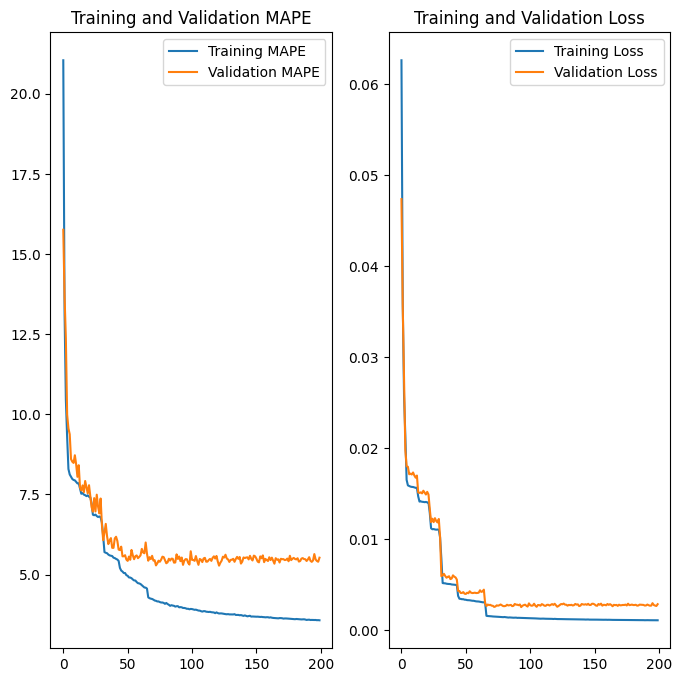

In [34]:
acc = history.history['mean_absolute_percentage_error']
val_acc = history.history['val_mean_absolute_percentage_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training MAPE')
plt.plot(epochs_range, val_acc, label='Validation MAPE')
plt.legend(loc='upper right')
plt.title('Training and Validation MAPE')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [61]:
nizama_temp.save("nizamabad_heat_nasa.h5", save_format='h5') # Saving model in h5 format to use it later

In [36]:
res=nizama_temp.evaluate(X_test,y_test)

12/12 [==============================] - 0s 28ms/step - loss: 0.0028 - mean_absolute_percentage_error: 5.5180


In [40]:
df=df.drop(['pressure'], axis=1)
test_x=df[10958:11323]
display(test_x)
test_x=test_x.to_numpy()
test_x=test_x.reshape(1,365,3)
test_x

,temp_max,rainfall,Humidity
Date,,,
2021-01-01,0.613997,0.000000,0.548858
2021-01-02,0.605738,0.000000,0.563928
2021-01-03,0.630732,0.000000,0.495382
2021-01-04,0.633341,0.000000,0.483714
2021-01-05,0.643990,0.000000,0.551774
...,...,...,...
2021-12-27,0.639209,0.000000,0.569762
2021-12-28,0.618126,0.000118,0.593583
2021-12-29,0.602043,0.001420,0.569762


array([[[0.61399696, 0.        , 0.54885756],
        [0.60573788, 0.        , 0.56392805],
        [0.63073245, 0.        , 0.49538162],
        ...,
        [0.60204303, 0.00142017, 0.56976179],
        [0.58422082, 0.00078899, 0.55760817],
        [0.61573571, 0.        , 0.53719008]]])

In [41]:
test_y=df['temp_max'][11323:]
test_y=test_y.to_numpy()
test_y

array([0.6196479 , 0.62312541, 0.62942839, 0.63464464, 0.63051511,
       0.64485981, 0.64833732, 0.60617257, 0.63420995, 0.61573571,
       0.62377744, 0.60573788, 0.58009128, 0.61877853, 0.58704629,
       0.60291241, 0.61051945, 0.63594871, 0.62116931, 0.65768311,
       0.668985  , 0.69006738, 0.62595088, 0.58682895, 0.57878722,
       0.59182786, 0.59074114, 0.59161052, 0.6107368 , 0.66659422,
       0.69897848, 0.70528146, 0.72288633, 0.72658118, 0.64029559,
       0.66789828, 0.68093893, 0.70267333, 0.70680287, 0.70419474,
       0.66311671, 0.66159531, 0.68658987, 0.69723973, 0.70658552,
       0.71267116, 0.6709411 , 0.69593567, 0.69832645, 0.73679635,
       0.7641817 , 0.7641817 , 0.78548142, 0.7824386 , 0.78417735,
       0.78156922, 0.76309498, 0.76700717, 0.77048468, 0.78352532,
       0.78309063, 0.78265594, 0.77809172, 0.7843947 , 0.77939578,
       0.77439687, 0.78591611, 0.79982612, 0.77809172, 0.77113671,
       0.77874375, 0.80286894, 0.82482069, 0.84481634, 0.87741

In [46]:
predictions2=nizama_temp.predict(test_x)

1/1 [==============================] - 0s 27ms/step


In [ ]:
predictions2

In [47]:
predictions2= predictions2.reshape(365)
predictions2= pd.DataFrame(data=predictions2, index=df[11323:].index, columns=['temp_max'])

In [48]:
predictions2

,temp_max
Date,
2022-01-01,0.634954
2022-01-02,0.636564
2022-01-03,0.634707
2022-01-04,0.631763
2022-01-05,0.629902
...,...
2022-12-27,0.677901
2022-12-28,0.684424
2022-12-29,0.686598


In [49]:
predictions2.shape

(365, 1)

In [50]:
expected=pd.DataFrame(data=test_y, index=df[11323:].index, columns=["temp_max_actual"])

In [51]:
predictions2=predictions2*50
expected=expected*50

In [52]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [54]:
rmse= mse(expected, predictions2, squared=False)
print("RMSE: ",rmse)
mae1= mae(expected, predictions2)
print("MAE", mae1)
mape1= mape(expected, predictions2)
print("MAPE: {}%".format(mape1*100))

RMSE:  3.0143087097239523
MAE 2.5139414088010437
MAPE: 7.790636894417611%


In [55]:
prediction_low=predictions2-mae1
prediction_upper=predictions2+mae1

In [56]:
prediction_upper.columns=['upper bound temp']
prediction_low.columns=['lower bound temp']
predictions2.columns=['predicted temp']

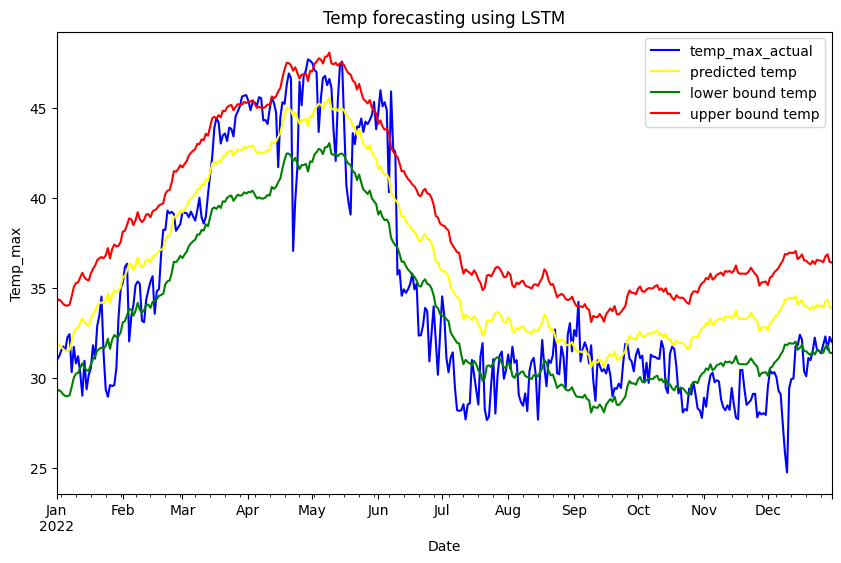

In [57]:
# Plotting to see how our actual data differs from predicted values
ax = expected.plot(
    figsize=(10, 6),
    color="blue",
    title="Temp forecasting using LSTM",
)
ax.set_ylabel("Temp_max")
ax.set_xlabel("Year")

predictions2.plot(ax=ax, color="yellow")     
prediction_low.plot(ax=ax, color="green")
prediction_upper.plot(ax=ax, color="red")
plt.show()

In [59]:
from tensorflow import keras

In [62]:
model = keras.models.load_model("nizamabad_heat_nasa.h5") # loading our previously saved model

,temp_max,rainfall,Humidity
Date,,,
2022-01-01,0.619648,0.000000,0.531356
2022-01-02,0.623125,0.000000,0.507535
2022-01-03,0.629428,0.000000,0.421488
2022-01-04,0.634645,0.000000,0.415168
2022-01-05,0.630515,0.000000,0.462810
...,...,...,...
2022-12-27,0.636818,0.010375,0.750608
2022-12-28,0.645729,0.006864,0.700049
2022-12-29,0.631384,0.000000,0.563928


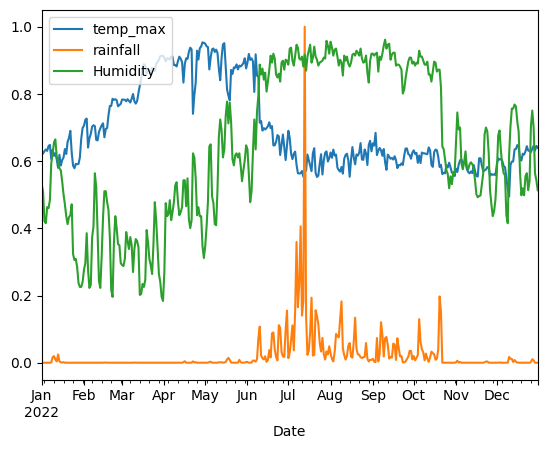

In [64]:
test_x1=df[11323:]                                      #data of year 2022 to predict temp data for 2023
(test_x1).plot()
display(test_x1)
test_x1=test_x1.to_numpy()
test_x1=test_x1.reshape(1,365,3)


In [65]:
pred1= model.predict(test_x1)                          #prediction values for year 2023

1/1 [==============================] - 0s 243ms/step


In [66]:
pred1 = pred1.reshape(365)
pred2 = pd.DataFrame(data=pred1,index=df[11323:].index, columns=['temp_max'])                       
pred2["temp_max"] = pred2["temp_max"]*50                #denormalisation  
pred2["date"]= pd.date_range(start='01-01-2023', end='31-12-2023')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8548\1616415326.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pred2["date"]= pd.date_range(start='01-01-2023', end='31-12-2023')


In [67]:
pred4=pred2.copy()
pred4=pred4.set_index('date')
pred4.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\nizamabad_prediction_temp2.csv")     #saving predicted data as csv

In [68]:
norm= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Normals\\temp_normals.csv")          #data of districtwise monthly climatic normal 1991-2021 

In [69]:
pred2= pred2.loc[(pred2['temp_max']>=40)]
# pred2= pred2.sort_values(by=['date'])
pred2['month']=pred2['date'].dt.month
pred2['normal']=pred2['month'].astype(float)

In [70]:
for i in range(len(pred2['temp_max'])):
    pred2['normal'][i] = float(norm['Nizamabad'][int(pred2["month"][i])-1]) 
pred2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8548\2465722213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred2['normal'][i] = float(norm['Nizamabad'][int(pred2["month"][i])-1])


,temp_max,date,month,normal
Date,,,,
2022-03-31,40.190845,2023-03-31,3,36.4
2022-04-01,40.564053,2023-04-01,4,40.0
2022-04-02,40.936066,2023-04-02,4,40.0
2022-04-03,41.209656,2023-04-03,4,40.0
2022-04-04,41.543640,2023-04-04,4,40.0
...,...,...,...,...
2022-06-06,40.795029,2023-06-06,6,36.0
2022-06-07,40.087627,2023-06-07,6,36.0
2022-06-08,40.094421,2023-06-08,6,36.0


In [82]:
pred2["diff"]= pred2['temp_max']-pred2['normal']                    #calculating departure from normal
pred3=pred2.loc[((pred2['normal']<=40) & (pred2['diff']>=5)) | ((pred2['normal']>=40) & (pred2['diff']>=4)) | (pred2['temp_max']>=45)]
pred3["heat"]=(pred3["temp_max"]).astype(str)
pred3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8548\802398353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred3["heat"]=(pred3["temp_max"]).astype(str)


,temp_max,date,month,normal,diff,heat
Date,,,,,,
2022-04-12,44.197445,2023-04-12,4,40.0,4.197445,44.197445
2022-04-15,44.112797,2023-04-15,4,40.0,4.112797,44.112797
2022-04-16,44.107109,2023-04-16,4,40.0,4.107109,44.10711
2022-04-17,44.482563,2023-04-17,4,40.0,4.482563,44.482563
2022-04-18,44.776894,2023-04-18,4,40.0,4.776894,44.776894
2022-04-19,44.993336,2023-04-19,4,40.0,4.993336,44.993336
2022-04-20,44.990227,2023-04-20,4,40.0,4.990227,44.990227
2022-04-21,44.660629,2023-04-21,4,40.0,4.660629,44.66063
2022-04-22,44.457737,2023-04-22,4,40.0,4.457737,44.457737


In [83]:
for i in range(len(pred3['temp_max'])):          #classification of heatwave and severe heatwave
    if (((pred3['normal'][i]<=40) & (pred3['diff'][i]<7)) | ((pred3['normal'][i]>40) & (pred3['diff'][i]<6))):
        pred3['heat'][i]='Warning! Heatwave expected'
    elif (((pred3['normal'][i]<=40) & (pred3['diff'][i]>=7)) | ((pred3['normal'][i]>40) & (pred3['diff'][i]>=6)) | (pred3['temp_max'][i]>=45)):
        pred3['heat'][i]='Warning! Severe Heatwave expected'


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8548\2156373600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred3['heat'][i]='Warning! Heatwave expected'


In [84]:
pred3=pred3.set_index('date')
pred3=pred3.drop(['month', 'normal', 'diff'], axis=1)
pred3 # final dataframe containing occurences of heatwaves for Nizamabad district

,temp_max,heat
date,,
2023-04-12,44.197445,Warning! Heatwave expected
2023-04-15,44.112797,Warning! Heatwave expected
2023-04-16,44.107109,Warning! Heatwave expected
2023-04-17,44.482563,Warning! Heatwave expected
2023-04-18,44.776894,Warning! Heatwave expected
2023-04-19,44.993336,Warning! Heatwave expected
2023-04-20,44.990227,Warning! Heatwave expected
2023-04-21,44.660629,Warning! Heatwave expected
2023-04-22,44.457737,Warning! Heatwave expected


In [85]:
pred3.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\nizamabad_heatwave_prediction.csv")  #saving dataframe as csv file